In [12]:
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

In [16]:
# Ajustes nas configurações padrões dos plots
mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

In [17]:
import pandas as pd

dataset = pd.read_csv('housesToRentProcessed.csv')

In [25]:
dataset.describe()

,São Paulo,Porto Alegre,Rio de Janeiro,Campinas,Belo Horizonte,area,rooms,bathroom,parking spaces,floor,isHouse,animal,furniture,y con + alu
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,0.550599,0.111579,0.140385,0.079779,0.117658,149.217920,2.506079,2.236813,1.609147,5.298167,0.230172,0.777778,0.243734,5.070269e+03
std,0.497456,0.314862,0.347403,0.270964,0.322218,537.016942,1.171266,1.407198,1.589521,5.888747,0.420963,0.415759,0.429354,1.608157e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.800000e+02
25%,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.980000e+03
50%,1.000000,0.000000,0.000000,0.000000,0.000000,90.000000,2.000000,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,3.379000e+03
75%,1.000000,0.000000,0.000000,0.000000,0.000000,182.000000,3.000000,3.000000,2.000000,8.000000,0.000000,1.000000,0.000000,6.250000e+03
max,1.000000,1.000000,1.000000,1.000000,1.000000,46335.000000,13.000000,10.000000,12.000000,301.000000,1.000000,1.000000,1.000000,1.119790e+06


Text(0, 0.5, 'Preço (em milhão)')

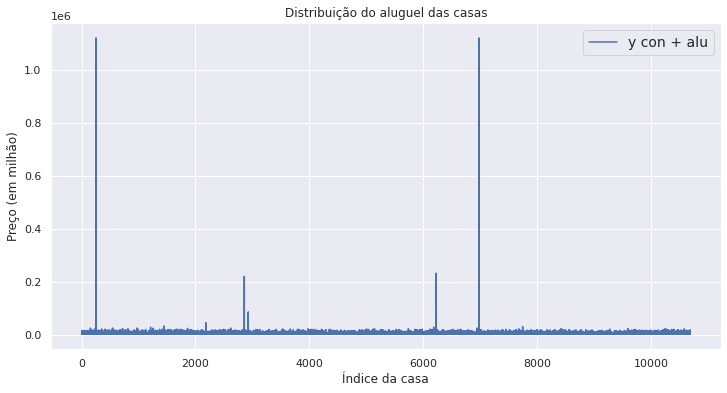

In [39]:
#ax = dataset.sort_values(by='y con + alu').reset_index()[['y con + alu']].plot(title='Distribuição do aluguel das casa')
ax = dataset[['y con + alu']].plot(title='Distribuição do aluguel das casas')
ax.set_xlabel("Índice da casa")
ax.set_ylabel("Preço (em milhão)")

<AxesSubplot:>

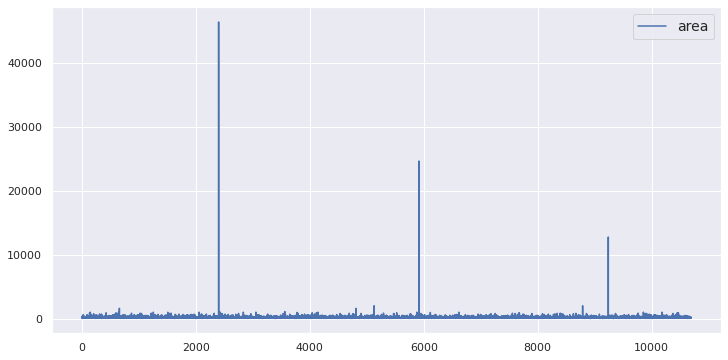

In [40]:
dataset[['area']].plot()

<AxesSubplot:>

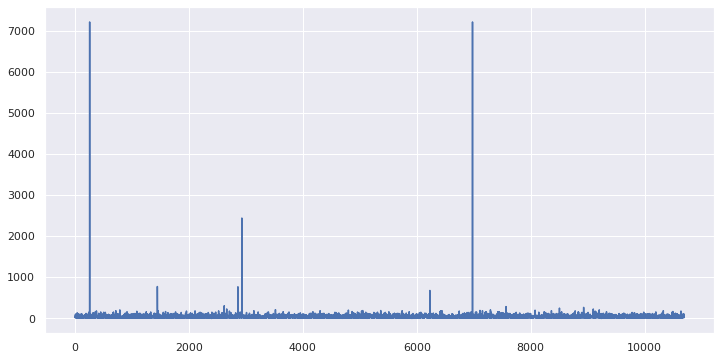

In [44]:
(dataset['y con + alu']/dataset['area']).plot()